In [1]:
# Add relevant Jupyter notebook extensions 

In [1]:
import sys, os
sys.path.append(os.path.dirname(os.getcwd()))



In [2]:
from mission import Mission
from uuv_mission.dynamic import ClosedLoop, Submarine
from control import PDController
import numpy as np

print("✅ Imports successful")


✅ Imports successful


In [ ]:
mission = Mission.from_csv("../mission.csv")
controller = PDController(kp=0.03, kd=0.75)

submarine = Submarine()
system = ClosedLoop(submarine, controller)

print("✅ System ready for simulation")


✅ System ready for simulation


In [47]:
disturbances = np.zeros(10)

result = system.simulate(
    Mission(
        reference=mission.reference[:10],
        cave_height=mission.cave_height[:10],
        cave_depth=mission.cave_depth[:10]
    ),
    disturbances
)

print("✅ Simulation finished.")
print("Depths:", result["positions"])
print("Actions:", result["actions"])


Step 0, depth = 0.00
✅ Simulation finished.
Depths: [ 0.          0.          1.34500002  3.92252392  6.862155    9.22636099
 10.41624118 10.27588311  9.00654588  7.01497034]
Actions: [ 0.          1.34500002  1.36702387  0.61985957 -0.28146198 -0.93790519
 -1.21125025 -1.14301496 -0.84917205 -0.44693625]


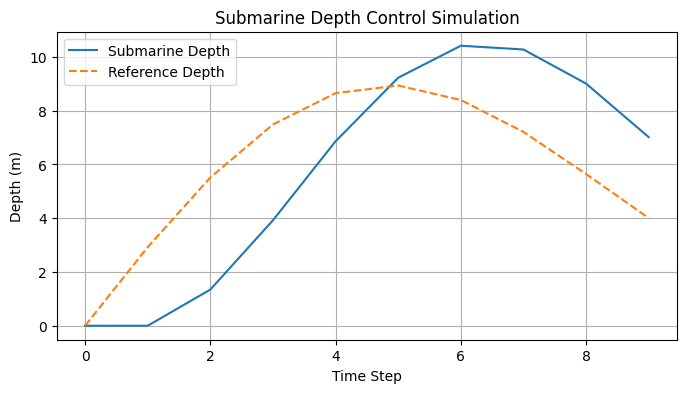

In [48]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 4))
plt.plot(result["positions"], label="Submarine Depth")
plt.plot(mission.reference[:len(result["positions"])], "--", label="Reference Depth")
plt.xlabel("Time Step")
plt.ylabel("Depth (m)")
plt.title("Submarine Depth Control Simulation")
plt.legend()
plt.grid(True)
plt.show()


Step 0, depth = 0.00
Step 10, depth = 3.48
Step 20, depth = 10.65
Step 30, depth = 3.04
Step 40, depth = 14.79
Step 50, depth = 12.98
Step 60, depth = 1.70
Step 70, depth = 13.27
Step 80, depth = 3.20
Step 90, depth = -6.42


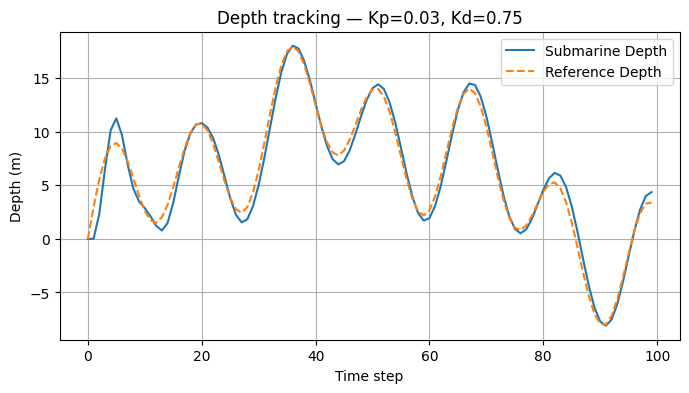

In [49]:
# run full sim and save figure
controller = PDController(kp=0.03, kd=0.75)
submarine = Submarine()
system = ClosedLoop(submarine, controller)

Nfull = 100
res_full = system.simulate(
    Mission(reference=mission.reference[:Nfull],
            cave_height=mission.cave_height[:Nfull],
            cave_depth=mission.cave_depth[:Nfull]),
    np.zeros(Nfull)
)

# plot and save
import matplotlib.pyplot as plt
plt.figure(figsize=(8,4))
plt.plot(res_full["positions"], label="Submarine Depth")
plt.plot(mission.reference[:Nfull], "--", label="Reference Depth")
plt.xlabel("Time step")
plt.ylabel("Depth (m)")
plt.title(f"Depth tracking — Kp={controller.kp}, Kd={controller.kd}")
plt.legend()
plt.grid(True)
plt.savefig("depth_plot.png", dpi=200, bbox_inches="tight")
plt.show()


In [1]:
import sys
print(sys.executable)


c:\Users\hatti\Desktop\b1-coding-practical-mt24\.venv\Scripts\python.exe


In [ ]:
# You can double-check your Python path like this...
import sys  
print(sys.path)

# Simulate closed-loop
After implementing your control functionality, you can simulate the closed-loop with code that looks something like this...

In [ ]:
# Import relevant modules

sub = Submarine()
# Instantiate your controller (depending on your implementation)
closed_loop = ClosedLoop(sub, controller)
mission = Mission.from_csv("path/to/file") # You must implement this method in the Mission class

trajectory = closed_loop.simulate_with_random_disturbances(mission)
trajectory.plot_completed_mission(mission)


In [7]:
from mission import Mission
from uuv_mission.dynamic import ClosedLoop
from control import PDController
from submarine import Submarine
import numpy as np

mission = Mission.from_csv("mission.csv")
controller = PDController()
submarine = Submarine()

system = ClosedLoop(submarine, controller)

# simulate with zero disturbances
disturbances = np.zeros(len(mission.reference))
result = system.simulate(mission, disturbances)

print("Simulation finished.")
print("First few depths:", result["positions"][:5])
print("First few actions:", result["actions"][:5])


IndentationError: unindent does not match any outer indentation level (dynamic.py, line 91)

In [2]:
result = system.simulate(
    Mission(reference=mission.reference[:100],  # first 100 steps only
             cave_height=mission.cave_height[:100],
             cave_depth=mission.cave_depth[:100]),
    np.zeros(100)
)

NameError: name 'system' is not defined

In [ ]:
result = system.simulate(
    Mission(reference=mission.reference[:20],
            cave_height=mission.cave_height[:100],
            cave_depth=mission.cave_depth[:100]),
    np.zeros(100)
)
